In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Load Dataset

In [122]:
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

df = pd.read_csv('../data/NumericalLoanData.csv', low_memory=False)

# Logistic Regression with all columns

In [135]:
x = df.drop('Default', axis=1)
y = df['Default']

x_scaled = StandardScaler().fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)


logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
y_pred = logistic_regression_model.predict(x_test)


print("Score:", logistic_regression_model.coef_)
print("Score:", logistic_regression_model.intercept_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, logistic_regression_model.predict_proba(x_test)[:, 1]))

Score: [[-0.0325  0.0377  0.1014 -0.045   0.0667 -0.0756  0.4431  0.1034  0.0198
   0.623   0.2053  0.0603 -0.0138 -0.003  -0.0281  0.0401  0.0549  0.0006
  -0.0188]]
Score: [0.3026]
Score: 1
Accuracy: 0.6766441214563247
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61      3012
           1       0.70      0.75      0.73      3937

    accuracy                           0.68      6949
   macro avg       0.67      0.66      0.67      6949
weighted avg       0.67      0.68      0.67      6949

ROC AUC Score: 0.7265671038646195


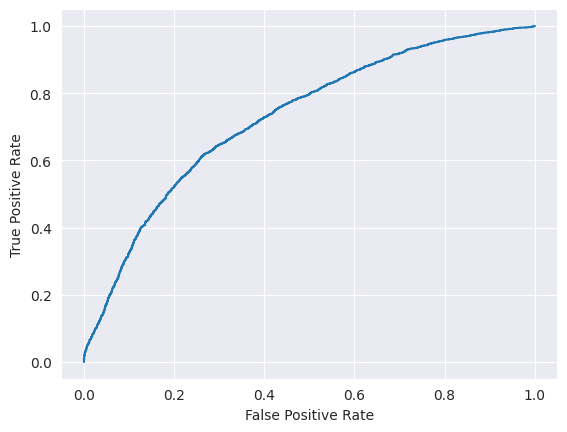

In [124]:
y_pred_proba = logistic_regression_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Selection (Forward Stepwise Selection)

In [137]:
sfs = SequentialFeatureSelector(LogisticRegression(),
                                k_features='best',
                                forward=True,
                                floating=False, 
                                verbose=2,
                                scoring='accuracy',
                                cv=5)
selected_features = sfs.fit(x_train, y_train)
selected_columns = selected_features.k_feature_idx_


print("Selected features:", selected_features.k_feature_idx_)


x.iloc[:, np.asarray(selected_features.k_feature_idx_)]


[2023-12-28 19:13:43] Features: 1/19 -- score: 0.6368899160218506
[2023-12-28 19:13:45] Features: 2/19 -- score: 0.6676139606393676
[2023-12-28 19:13:46] Features: 3/19 -- score: 0.6711397293390328
[2023-12-28 19:13:48] Features: 4/19 -- score: 0.671679336509206
[2023-12-28 19:13:50] Features: 5/19 -- score: 0.6729384910851675
[2023-12-28 19:13:52] Features: 6/19 -- score: 0.6742335327636434
[2023-12-28 19:13:53] Features: 7/19 -- score: 0.6745573255373036
[2023-12-28 19:13:55] Features: 8/19 -- score: 0.6750969521199014
[2023-12-28 19:13:56] Features: 9/19 -- score: 0.6750970168279838
[2023-12-28 19:13:58] Features: 10/19 -- score: 0.6753128765201547
[2023-12-28 19:13:59] Features: 11/19 -- score: 0.6752768794139
[2023-12-28 19:14:00] Features: 12/19 -- score: 0.6752768794139
[2023-12-28 19:14:01] Features: 13/19 -- score: 0.6752409599573445
[2023-12-28 19:14:03] Features: 14/19 -- score: 0.6752409470157279
[2023-12-28 19:14:04] Features: 15/19 -- score: 0.6750250808527489
[2023-12-2

Selected features: (0, 1, 2, 5, 6, 7, 9, 10, 17, 18)



[2023-12-28 19:14:07] Features: 19/19 -- score: 0.6738018004376856

,Age,AppliedAmount,DebtToIncome,LiabilitiesTotal,LoanDuration,NewCreditCustomer,WOECountry,WOEEducation,WOEUseOfLoan,WOEWorkExperience
0,53,2125.0000,26.2900,485.0900,60,0,-0.4964,-0.2142,-0.0249,0.0350
1,50,3000.0000,30.5800,736.4500,60,0,-0.4964,-0.2081,-0.0249,0.0350
2,44,10630.0000,26.7100,905.0000,60,1,-0.4964,-0.2142,-0.0249,0.0350
3,42,1500.0000,7.3600,350.0000,60,1,0.9821,0.3224,-0.0249,-0.0213
4,34,1595.0000,36.0400,940.0000,48,1,0.9821,-0.2142,0.0271,-0.0213
...,...,...,...,...,...,...,...,...,...,...
34740,38,2000.0000,9.4000,830.0000,60,1,0.7346,0.5210,0.0271,-0.0213
34741,37,7440.0000,69.7700,2488.0900,60,0,0.7346,-0.2142,-0.0249,0.0350
34742,37,1595.0000,30.1300,1877.0000,60,0,0.9821,0.5210,0.0271,0.0350
34743,58,3000.0000,25.3500,359.0000,60,1,-0.4964,0.5210,0.0271,0.0350


## Logistic Regression with columns after Feature Selection

In [126]:
x_test_after_feature_selection = x_test[:, np.asarray(selected_features.k_feature_idx_)]
x_train_after_feature_selection = x_train[:, np.asarray(selected_features.k_feature_idx_)]


logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train_after_feature_selection, y_train)
y_pred = logistic_regression_model.predict(x_test_after_feature_selection)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, logistic_regression_model.predict_proba(x_test_after_feature_selection)[:, 1]))

Accuracy: 0.6756367822708303
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.58      0.61      3070
           1       0.69      0.75      0.72      3879

    accuracy                           0.68      6949
   macro avg       0.67      0.67      0.67      6949
weighted avg       0.67      0.68      0.67      6949

ROC AUC Score: 0.7274641370513406


# LASSO

In [127]:
param_grid = {'C': np.logspace(-3, 3, 7)}

logreg = LogisticRegression(penalty='l1', solver='liblinear')

grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_C = grid_search.best_params_['C']

logistic_regression_lasso_model = LogisticRegression(penalty='l1', C=best_C, solver='liblinear')
logistic_regression_lasso_model.fit(x_train, y_train)

y_pred = logistic_regression_lasso_model.predict(x_test)

print("Best C:", best_C)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, logistic_regression_lasso_model.predict_proba(x_test)[:, 1]))

Best C: 0.01
Accuracy: 0.6711757087350698
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61      3070
           1       0.69      0.74      0.72      3879

    accuracy                           0.67      6949
   macro avg       0.67      0.66      0.66      6949
weighted avg       0.67      0.67      0.67      6949

ROC AUC Score: 0.7264661969193511


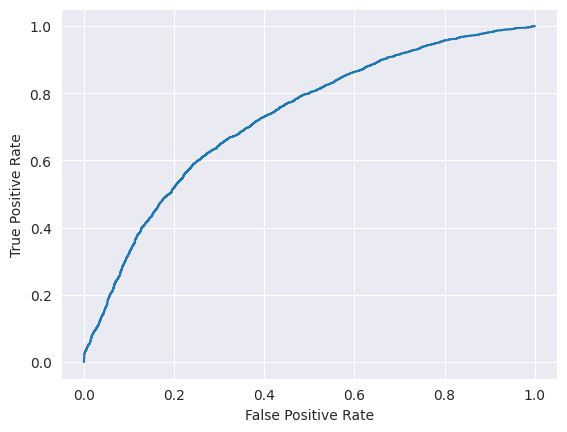

In [128]:
y_pred_proba = logistic_regression_lasso_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RIDGE

In [129]:
param_grid = {'C': np.logspace(-3, 3, 7)}

logreg = LogisticRegression(penalty='l2')

grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_C = grid_search.best_params_['C']

logistic_regression_ridge_model = LogisticRegression(penalty='l2', C=best_C)
logistic_regression_ridge_model.fit(x_train, y_train)

y_pred = logistic_regression_ridge_model.predict(x_test)

print("C parameter grid:", param_grid['C'])
print("Best C:", best_C)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, logistic_regression_ridge_model.predict_proba(x_test)[:, 1]))

C parameter grid: [   0.001    0.01     0.1      1.      10.     100.    1000.   ]
Best C: 0.001
Accuracy: 0.6716074255288531
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60      3070
           1       0.69      0.76      0.72      3879

    accuracy                           0.67      6949
   macro avg       0.67      0.66      0.66      6949
weighted avg       0.67      0.67      0.67      6949

ROC AUC Score: 0.7259262478240387


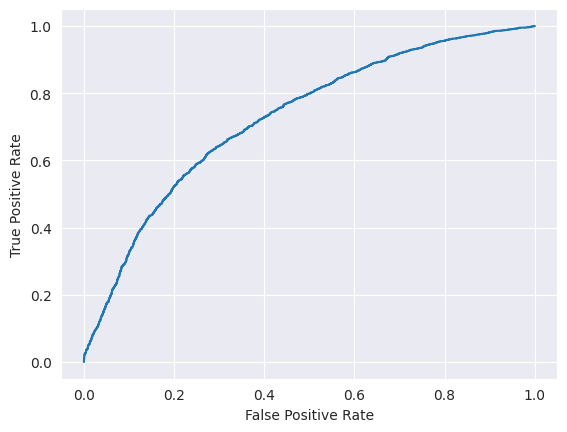

In [130]:
y_pred_proba = logistic_regression_ridge_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()